In [1]:
import functions.q_generator
import functions.data_preperation as dp
import functions.stock_corr as sc

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt


In [2]:
tickers = [
    # S&P 500 (10)
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NVDA", "JNJ", "V", "JPM",
    
    # Euro Stocks (5)
    "SAP.DE", "AIR.PA", "NESN.SW", "OR.PA",
    
    # FTSE 100 (5)
    "HSBA.L", "BP.L", "GSK.L", "VOD.L", "RIO.L", "LLOY.L",
    
    # Other Global Stocks (5)
    "TSM", "BABA", "SONY", "TCEHY", "TM"
]

num_tickers = len(tickers)



/Users/a01milner/Documents/Schro-horse/functions/data_preperation.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  25 of 25 completed
/Users/a01milner/Documents/Schro-horse/functions/data_preperation.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[("OC_next", ticker)] = close_next - open_next
/Users/a01milner/Documents/Schro-horse/functions/data_preperation.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

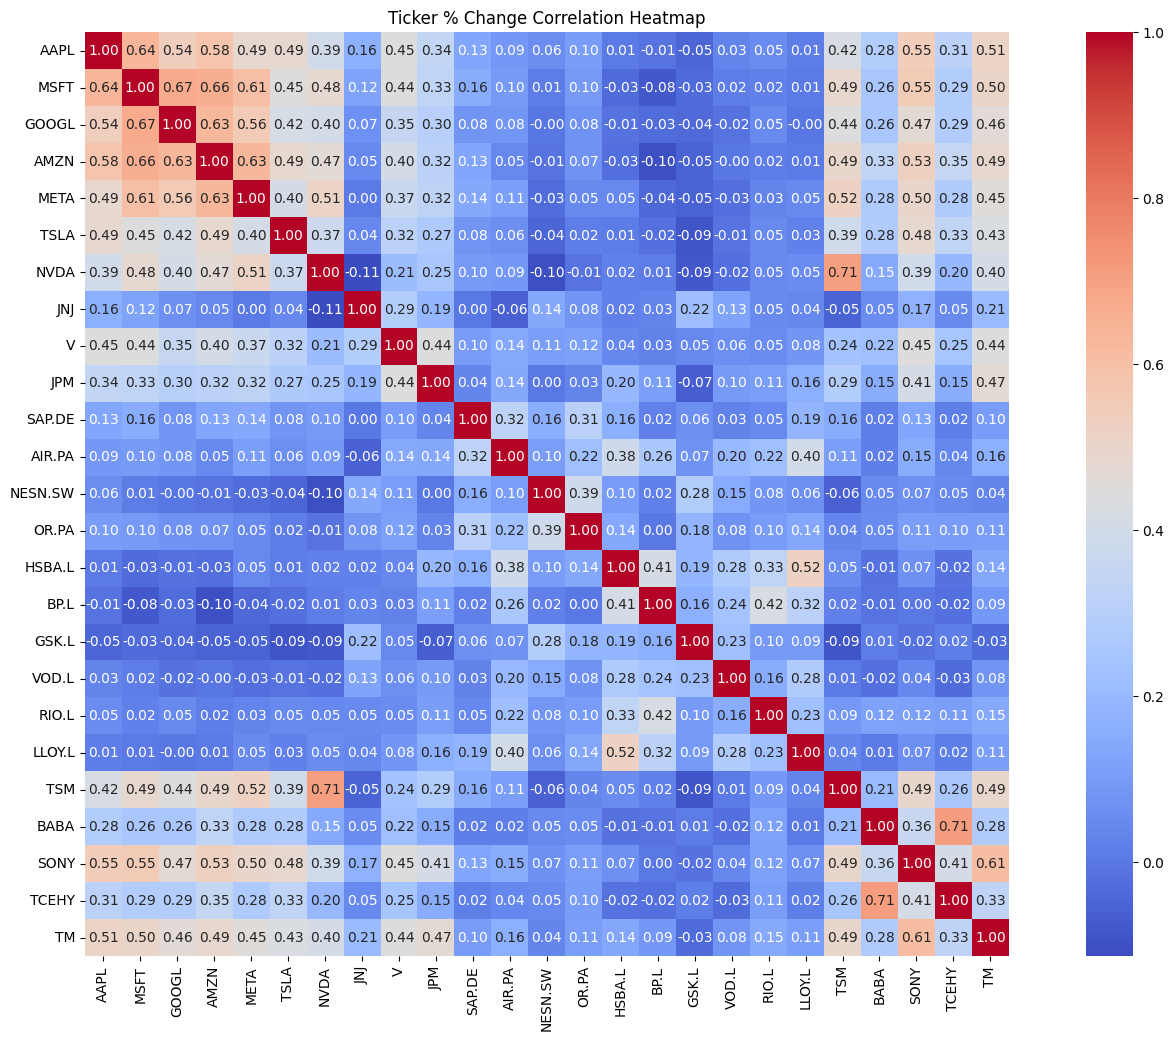

In [3]:
data = dp.download_stock_data(tickers, years=5)

for t in tickers:
    data = dp.add_OC_CO_next_changes(data, t)

#data = dp.remove_na(data)

dp.plot_tickers_pct_change_corr(data, tickers, title="Ticker % Change Correlation Heatmap")

In [4]:
pct_change_cols = [(f"OC_next", t) for t in tickers]
df_pct = data[pct_change_cols].copy()

# Flatten columns for convenience
df_pct.columns = [t for _, t in df_pct.columns]

# Compute correlation
corr = df_pct.corr().abs()


corr

,AAPL,MSFT,GOOGL,AMZN,META,TSLA,NVDA,JNJ,V,JPM,...,BP.L,GSK.L,VOD.L,RIO.L,LLOY.L,TSM,BABA,SONY,TCEHY,TM
AAPL,1.000000,0.635769,0.537998,0.584336,0.485629,0.485611,0.393520,0.161104,0.447741,0.341002,...,0.009012,0.046906,0.033470,0.053167,0.013911,0.417862,0.282540,0.546861,0.314472,0.510603
MSFT,0.635769,1.000000,0.671848,0.664967,0.608434,0.446450,0.481865,0.122505,0.444007,0.331555,...,0.079211,0.031863,0.015944,0.022060,0.008341,0.485632,0.255025,0.552100,0.285360,0.504611
GOOGL,0.537998,0.671848,1.000000,0.632391,0.557665,0.416349,0.402084,0.067254,0.354695,0.303633,...,0.029731,0.037680,0.015379,0.051572,0.001399,0.444678,0.256469,0.469857,0.285410,0.462899
AMZN,0.584336,0.664967,0.632391,1.000000,0.631832,0.485805,0.467154,0.046034,0.401892,0.316534,...,0.102360,0.054507,0.000263,0.015259,0.005297,0.492372,0.330685,0.526486,0.350185,0.489255
META,0.485629,0.608434,0.557665,0.631832,1.000000,0.404564,0.512838,0.004329,0.367973,0.323405,...,0.043142,0.053803,0.025733,0.030703,0.051429,0.523104,0.275911,0.499370,0.275149,0.453430
TSLA,0.485611,0.446450,0.416349,0.485805,0.404564,1.000000,0.371612,0.041665,0.316120,0.270082,...,0.019032,0.088770,0.011682,0.049407,0.025803,0.387281,0.280978,0.484824,0.333421,0.428858
NVDA,0.393520,0.481865,0.402084,0.467154,0.512838,0.371612,1.000000,0.113280,0.211380,0.252855,...,0.009566,0.085503,0.022685,0.046521,0.053917,0.705361,0.146864,0.388771,0.198103,0.404420
JNJ,0.161104,0.122505,0.067254,0.046034,0.004329,0.041665,0.113280,1.000000,0.290324,0.187795,...,0.034130,0.218988,0.129059,0.049387,0.040839,0.048842,0.054409,0.172691,0.050707,0.206312
V,0.447741,0.444007,0.354695,0.401892,0.367973,0.316120,0.211380,0.290324,1.000000,0.438349,...,0.026480,0.046620,0.061172,0.054469,0.083600,0.238417,0.224575,0.448249,0.248255,0.435925
JPM,0.341002,0.331555,0.303633,0.316534,0.323405,0.270082,0.252855,0.187795,0.438349,1.000000,...,0.108806,0.066551,0.098766,0.106968,0.164561,0.285627,0.153774,0.406573,0.154706,0.469992


In [5]:
def get_most_correlated_pairs(corr: pd.DataFrame, top_x: int = 1):
    """
    For each stock, pick its top X most correlated stocks and form unique sets.
    
    Parameters
    ----------
    corr : pd.DataFrame
        Absolute correlation matrix (tickers x tickers)
    top_x : int
        Number of closest correlated stocks to include per stock.
    
    Returns
    -------
    List[set]
        List of unique sets of correlated tickers.
    """
    tickers = corr.columns
    added_sets = []

    for t in tickers:
        # Get correlations of this stock with all others, sorted descending
        sorted_corr = corr[t].sort_values(ascending=False)
        # Exclude self
        sorted_corr = sorted_corr[sorted_corr.index != t]

        count = 0
        for other_ticker in sorted_corr.index:
            pair_set = {t, other_ticker}

            # Check if this set already exists
            if not any(pair_set == s for s in added_sets):
                added_sets.append(pair_set)
                count += 1

            if count >= top_x:
                break

    return added_sets


In [6]:
top_pairs = get_most_correlated_pairs(corr, top_x=1)
print(top_pairs)
print(f"Total unique pairs: {len(top_pairs)}")




[{'MSFT', 'AAPL'}, {'MSFT', 'GOOGL'}, {'AMZN', 'GOOGL'}, {'MSFT', 'AMZN'}, {'AMZN', 'META'}, {'AMZN', 'TSLA'}, {'TSM', 'NVDA'}, {'V', 'JNJ'}, {'V', 'SONY'}, {'TM', 'JPM'}, {'AIR.PA', 'SAP.DE'}, {'AIR.PA', 'LLOY.L'}, {'NESN.SW', 'OR.PA'}, {'SAP.DE', 'OR.PA'}, {'HSBA.L', 'LLOY.L'}, {'RIO.L', 'BP.L'}, {'NESN.SW', 'GSK.L'}, {'VOD.L', 'LLOY.L'}, {'RIO.L', 'HSBA.L'}, {'BP.L', 'LLOY.L'}, {'TSM', 'META'}, {'TCEHY', 'BABA'}, {'SONY', 'TM'}, {'TCEHY', 'SONY'}, {'TM', 'AAPL'}]
Total unique pairs: 25


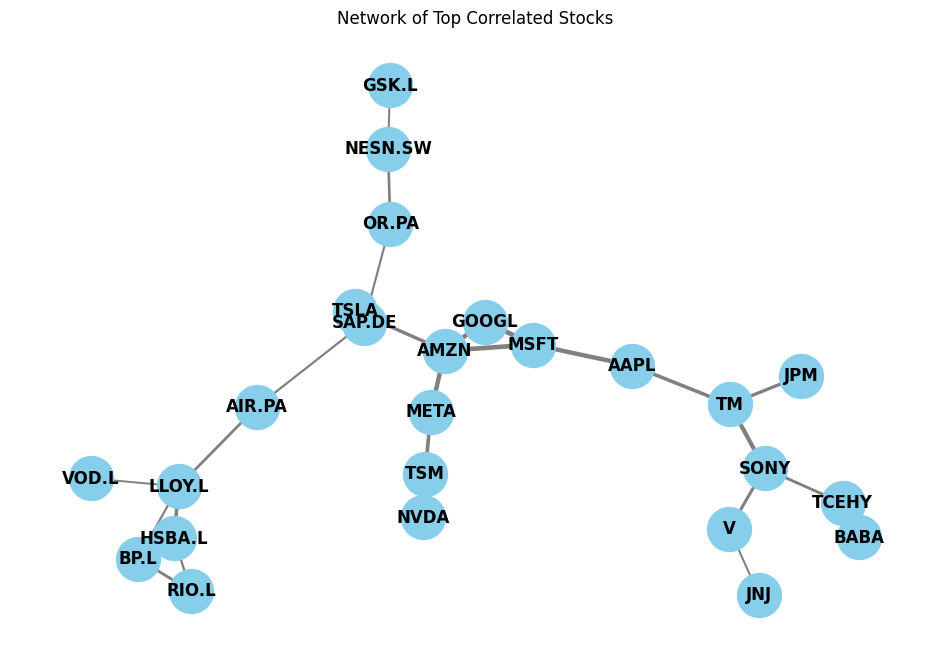

In [7]:
# Assuming top_pairs is your list of sets
G = nx.Graph()

# Add edges for each pair
for pair in top_pairs:
    stock1, stock2 = tuple(pair)
    # Use correlation as edge weight (optional)
    weight = corr.loc[stock1, stock2]
    G.add_edge(stock1, stock2, weight=weight)

# Draw the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # force-directed layout

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')

# Draw edges with thickness proportional to correlation
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[d['weight']*5 for (_, _, d) in edges],  # scale thickness
    edge_color='gray'
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title("Network of Top Correlated Stocks")
plt.axis('off')
plt.show()

In [8]:
def connect_components_by_highest_corr(G, corr):
    """
    Connect disconnected components of G by adding edges with the highest correlation
    until the graph is fully connected.
    """
    while not nx.is_connected(G):
        components = list(nx.connected_components(G))
        # Find the pair of nodes across different components with highest correlation
        max_corr = -1
        best_pair = None
        
        for i in range(len(components)):
            for j in range(i+1, len(components)):
                comp_i = components[i]
                comp_j = components[j]
                for node_i in comp_i:
                    for node_j in comp_j:
                        if corr.loc[node_i, node_j] > max_corr:
                            max_corr = corr.loc[node_i, node_j]
                            best_pair = (node_i, node_j)
        
        # Add the edge with highest correlation
        if best_pair:
            G.add_edge(*best_pair, weight=max_corr)
            
    return G

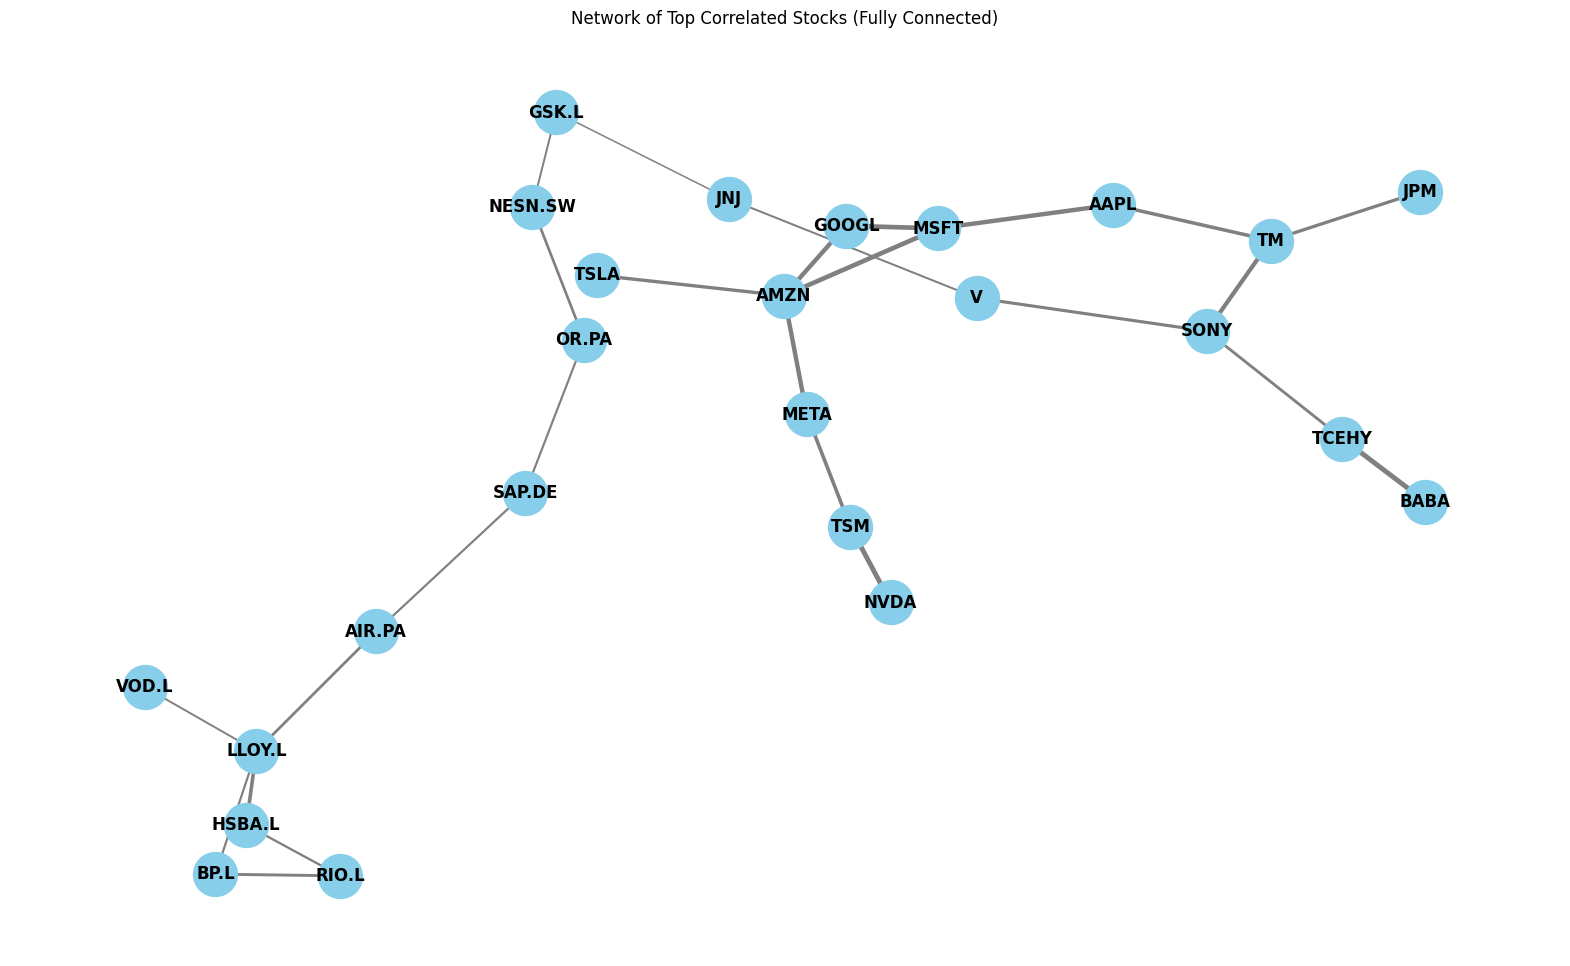

In [9]:
# Usage
G_connected = connect_components_by_highest_corr(G, corr)

# Now draw as before
plt.figure(figsize=(20, 12))
pos = nx.spring_layout(G_connected, seed=42)
nx.draw_networkx_nodes(G_connected, pos, node_size=1000, node_color='skyblue')
edges = G_connected.edges(data=True)
nx.draw_networkx_edges(G_connected, pos, edgelist=edges, width=[d['weight']*5 for (_, _, d) in edges], edge_color='gray')
nx.draw_networkx_labels(G_connected, pos, font_size=12, font_weight='bold')
plt.title("Network of Top Correlated Stocks (Fully Connected)")
plt.axis('off')
plt.show()

In [10]:
edges_list = list(G_connected.edges())
print(edges_list)


[('MSFT', 'AAPL'), ('MSFT', 'GOOGL'), ('MSFT', 'AMZN'), ('AAPL', 'TM'), ('GOOGL', 'AMZN'), ('AMZN', 'META'), ('AMZN', 'TSLA'), ('META', 'TSM'), ('TSM', 'NVDA'), ('V', 'JNJ'), ('V', 'SONY'), ('JNJ', 'GSK.L'), ('SONY', 'TM'), ('SONY', 'TCEHY'), ('TM', 'JPM'), ('AIR.PA', 'SAP.DE'), ('AIR.PA', 'LLOY.L'), ('SAP.DE', 'OR.PA'), ('LLOY.L', 'HSBA.L'), ('LLOY.L', 'VOD.L'), ('LLOY.L', 'BP.L'), ('NESN.SW', 'OR.PA'), ('NESN.SW', 'GSK.L'), ('HSBA.L', 'RIO.L'), ('RIO.L', 'BP.L'), ('TCEHY', 'BABA')]


In [18]:
edges_list = sc.top_bottom_edges_list(data,outputs = ["OC_next", "CO_next"])
print(edges_list[0])
print(edges_list[1])
set_edges_0 = set(frozenset(e) for e in edges_list[0])
set_edges_1 = set(frozenset(e) for e in edges_list[1])
diff = set_edges_0 ^ set_edges_1

diff

[('MSFT', 'AAPL'), ('MSFT', 'GOOGL'), ('MSFT', 'AMZN'), ('AAPL', 'TM'), ('GOOGL', 'AMZN'), ('AMZN', 'META'), ('AMZN', 'TSLA'), ('META', 'TSM'), ('TSM', 'NVDA'), ('V', 'JNJ'), ('V', 'SONY'), ('JNJ', 'GSK.L'), ('SONY', 'TM'), ('SONY', 'TCEHY'), ('TM', 'JPM'), ('AIR.PA', 'SAP.DE'), ('AIR.PA', 'LLOY.L'), ('SAP.DE', 'OR.PA'), ('LLOY.L', 'HSBA.L'), ('LLOY.L', 'VOD.L'), ('LLOY.L', 'BP.L'), ('NESN.SW', 'OR.PA'), ('NESN.SW', 'GSK.L'), ('HSBA.L', 'RIO.L'), ('RIO.L', 'BP.L'), ('TCEHY', 'BABA')]
[('V', 'AAPL'), ('V', 'JNJ'), ('V', 'JPM'), ('V', 'TM'), ('AAPL', 'TSLA'), ('MSFT', 'META'), ('META', 'AMZN'), ('META', 'NVDA'), ('AMZN', 'GOOGL'), ('AMZN', 'JPM'), ('AMZN', 'TSM'), ('NVDA', 'TSM'), ('TSM', 'HSBA.L'), ('AIR.PA', 'SAP.DE'), ('AIR.PA', 'LLOY.L'), ('AIR.PA', 'NESN.SW'), ('AIR.PA', 'OR.PA'), ('SAP.DE', 'LLOY.L'), ('LLOY.L', 'HSBA.L'), ('LLOY.L', 'BP.L'), ('LLOY.L', 'GSK.L'), ('LLOY.L', 'VOD.L'), ('BP.L', 'RIO.L'), ('RIO.L', 'TCEHY'), ('TCEHY', 'BABA'), ('SONY', 'TM')]


{frozenset({'AMZN', 'MSFT'}),
 frozenset({'HSBA.L', 'TSM'}),
 frozenset({'SONY', 'V'}),
 frozenset({'AMZN', 'TSLA'}),
 frozenset({'JPM', 'V'}),
 frozenset({'AIR.PA', 'NESN.SW'}),
 frozenset({'AIR.PA', 'OR.PA'}),
 frozenset({'GSK.L', 'NESN.SW'}),
 frozenset({'META', 'TSM'}),
 frozenset({'GSK.L', 'LLOY.L'}),
 frozenset({'AAPL', 'V'}),
 frozenset({'HSBA.L', 'RIO.L'}),
 frozenset({'AAPL', 'TM'}),
 frozenset({'TM', 'V'}),
 frozenset({'AAPL', 'MSFT'}),
 frozenset({'AMZN', 'TSM'}),
 frozenset({'RIO.L', 'TCEHY'}),
 frozenset({'OR.PA', 'SAP.DE'}),
 frozenset({'SONY', 'TCEHY'}),
 frozenset({'META', 'MSFT'}),
 frozenset({'NESN.SW', 'OR.PA'}),
 frozenset({'GOOGL', 'MSFT'}),
 frozenset({'META', 'NVDA'}),
 frozenset({'AMZN', 'JPM'}),
 frozenset({'JPM', 'TM'}),
 frozenset({'AAPL', 'TSLA'}),
 frozenset({'LLOY.L', 'SAP.DE'}),
 frozenset({'GSK.L', 'JNJ'})}

In [12]:
def build_expressive_stock_circuit(
    tickers,
    correlations=None,
    qubits_per_stock=3,
    reps=1,
    entanglement_threshold=0.2,
    inter_entanglement_gate='cry',
):
    """
    Builds a scalable, expressive parameterized quantum circuit for stock modeling.

    Parameters:
        tickers (list[str]) :
            List of stock ticker names.
        correlations (np.ndarray or None) :
            Optional correlation matrix (symmetric, values in [-1, 1]).
            If None, no inter-stock entanglement is applied.
        qubits_per_stock (int) :
            Number of qubits per stock block (default: 3).
        reps (int) :
            Number of repetitions of the block (depth).
        entanglement_threshold (float) :
            Minimum absolute correlation to consider for inter-stock entanglement.
        inter_entanglement_gate (str) :
            Type of gate to use for inter-stock entanglement ('cry' or 'cz').

    Returns:
        QuantumCircuit :
            A fully parameterized and expressive quantum circuit.
    """
    num_stocks = len(tickers)
    total_qubits = num_stocks * qubits_per_stock
    qc = QuantumCircuit(total_qubits)

    # Assign qubit blocks per stock
    block_indices = [
        list(range(i * qubits_per_stock, (i + 1) * qubits_per_stock))
        for i in range(num_stocks)
    ]

    param_count = 0
    # Add expressive intra-stock blocks
    for ticker, qubits in zip(tickers, block_indices):
        num_params = reps * qubits_per_stock * 2  # 2 parameters (RY, RZ) per qubit per rep
        params = ParameterVector(f'{ticker}_Î¸', length=num_params)

        idx = 0
        for _ in range(reps):
            # Parameterized single-qubit rotations
            for q in qubits:
                qc.ry(params[idx], q)
                qc.rz(params[idx + 1], q)
                idx += 2

            # Entanglement (ring of CXs within stock block)
            for i in range(len(qubits)):
                qc.cx(qubits[i], qubits[(i + 1) % len(qubits)])

    # Add inter-stock entanglement (optional)
    if correlations is not None:
        assert correlations.shape == (num_stocks, num_stocks), "Correlation matrix must match number of stocks"

        for i in range(num_stocks):
            for j in range(i + 1, num_stocks):
                corr = correlations[i, j]
                if abs(corr) >= entanglement_threshold:
                    q1 = block_indices[i][qubits_per_stock // 2]  # middle qubit of block i
                    q2 = block_indices[j][qubits_per_stock // 2]  # middle qubit of block j
                    angle = abs(corr) * np.pi

                    if inter_entanglement_gate == 'cry':
                        qc.cry(angle, q1, q2)
                    elif inter_entanglement_gate == 'cz':
                        qc.cz(q1, q2)
                    else:
                        raise ValueError(f"Unsupported gate type: {inter_entanglement_gate}")

    return qc